# Importing the Libraries

In [2]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [3]:
# Load the Dataset
df=pd.read_csv(r"D:\Project work 2\Unified Main Project\Electric Vehicle Sales by State in India(DA & DS project)\Electric Vehicle Sales by State in India.csv")

In [4]:
# Displat the first few rows of the dataset
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [6]:
# Convert date column to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [7]:
# Check for missing values
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


# Exploratory Data Analysis(EDA)

**Visualize trends in EV sales over time, across states, vehicle categories, vehicle classes, market share.**

### EV Sales Distribution

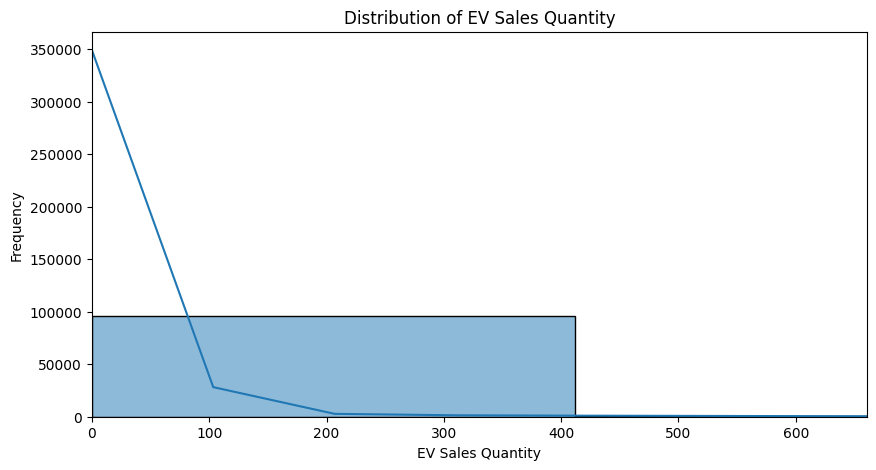

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of EV sales quantity
plt.figure(figsize=(10, 5))
sns.histplot(df["EV_Sales_Quantity"], bins=50, kde=True)
plt.title("Distribution of EV Sales Quantity")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Frequency")
plt.xlim(0, df["EV_Sales_Quantity"].quantile(0.99))  # Limiting x-axis to remove extreme outliers
plt.show()

**The distribution is highly skewed, with most sales values concentrated near zero.**

**A few records show very high sales figures, indicating possible outliers.**

### State-wise EV Sales

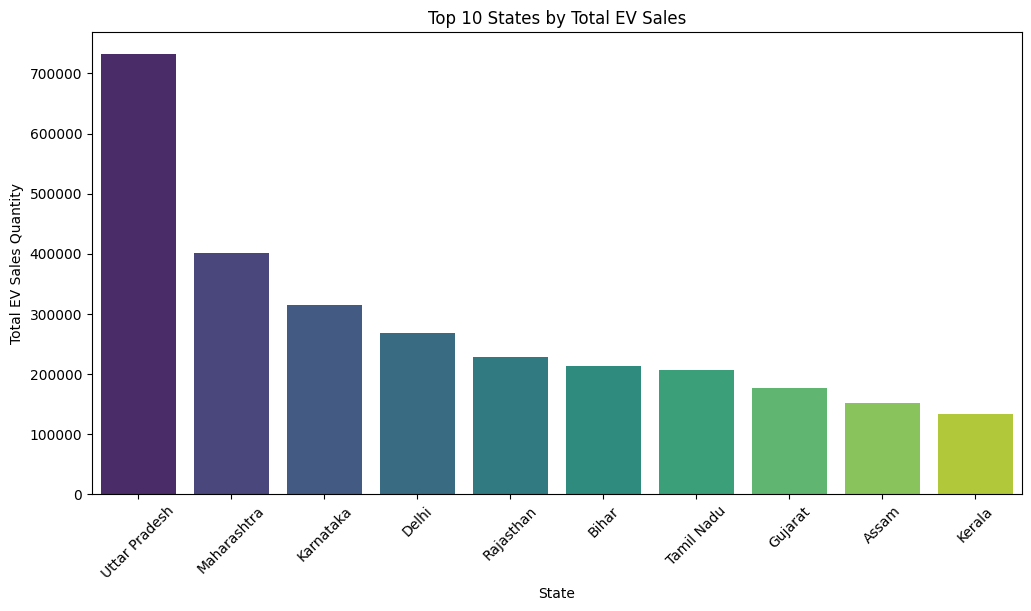

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Name: EV_Sales_Quantity, dtype: float64

In [9]:
# Aggregate total EV sales per state
state_sales = df.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

# Plot top 10 states with highest EV sales
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.head(10).index, y=state_sales.head(10).values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 States by Total EV Sales")
plt.xlabel("State")
plt.ylabel("Total EV Sales Quantity")
plt.show()

# Display the top 5 states with highest EV sales
state_sales.head(5)

**Uttar Pradesh leads with 732,074 EV sales.**

**Followed by Maharashtra, Karnataka, Delhi, and Rajasthan.**

**These states likely have better EV adoption due to government policies, infrastructure, or demand.**

### Yearly EV Sales Trend

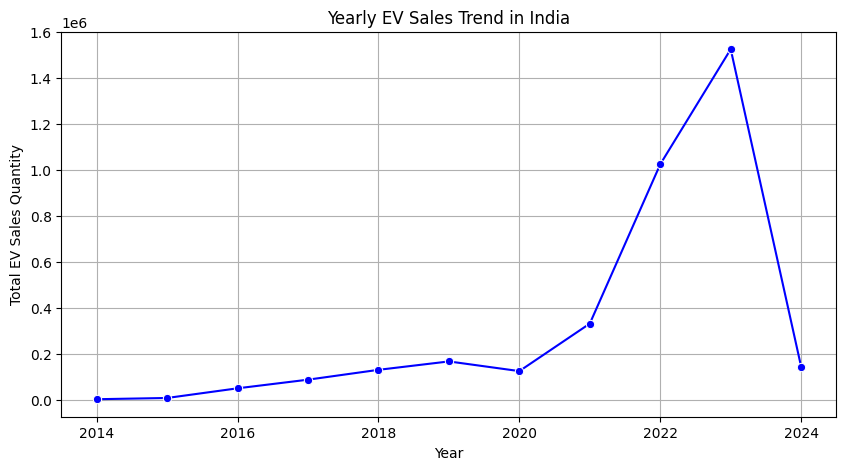

Year
2014.0       2392.0
2015.0       7805.0
2016.0      49855.0
2017.0      87420.0
2018.0     130254.0
2019.0     166819.0
2020.0     124684.0
2021.0     331498.0
2022.0    1024723.0
2023.0    1525179.0
2024.0     143182.0
Name: EV_Sales_Quantity, dtype: float64

In [10]:
# Aggregate yearly EV sales
yearly_sales = df.groupby("Year")["EV_Sales_Quantity"].sum()

# Plot yearly EV sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker="o", color="b")
plt.title("Yearly EV Sales Trend in India")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Quantity")
plt.grid(True)
plt.show()

# Display yearly sales data
yearly_sales

**Sales have seen exponential growth from 2014 (2,392 sales) to 2023 (1.52 million sales).**

**A sharp increase in 2021–2023 suggests rising adoption.**

**2024 data is incomplete, explaining the lower figure.**

### EV Sales by Vehicle Category

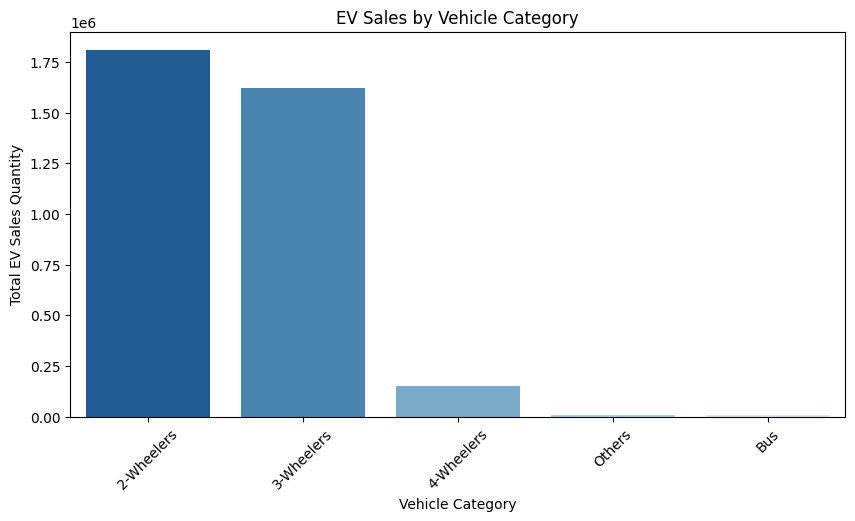

Vehicle_Category
2-Wheelers    1808105.0
3-Wheelers    1620310.0
4-Wheelers     149775.0
Others           8612.0
Bus              7009.0
Name: EV_Sales_Quantity, dtype: float64

In [11]:
# EV Sales by Vehicle Category
vehicle_category_sales = df.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

# Plot EV sales by vehicle category
plt.figure(figsize=(10, 5))
sns.barplot(x=vehicle_category_sales.index, y=vehicle_category_sales.values, palette="Blues_r")
plt.title("EV Sales by Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("Total EV Sales Quantity")
plt.xticks(rotation=45)
plt.show()

# Display vehicle category sales data
vehicle_category_sales

**2-Wheelers (1.8M sales) and 3-Wheelers (1.62M sales) dominate the EV market.**

**4-Wheelers (149K sales) have a lower adoption rate.**

**Buses (7K sales) and Other categories (8.6K sales) contribute the least.**

### Monthly EV Sales Trend

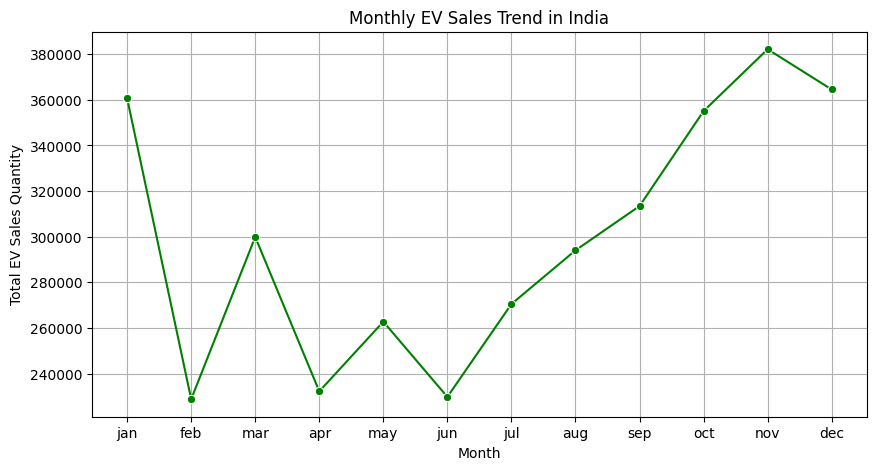

Month_Name
jan    360703.0
feb    228739.0
mar    299888.0
apr    232194.0
may    262747.0
jun    229754.0
jul    270473.0
aug    294022.0
sep    313433.0
oct    355083.0
nov    382217.0
dec    364558.0
Name: EV_Sales_Quantity, dtype: float64

In [12]:
# Monthly Sales Trend
monthly_sales = df.groupby("Month_Name")["EV_Sales_Quantity"].sum()

# Define correct order for months
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
monthly_sales = monthly_sales.reindex(month_order)

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="g")
plt.title("Monthly EV Sales Trend in India")
plt.xlabel("Month")
plt.ylabel("Total EV Sales Quantity")
plt.grid(True)
plt.show()

# Display monthly sales data
monthly_sales


**November (382K) and December (365K) have the highest sales, suggesting a year-end boost.**
    
**February (228K) has the lowest sales, possibly due to fewer days in the month.**
    
**Sales peak in March, October, and year-end, indicating potential seasonal patterns.**

# EV Sales by Vehicle Class

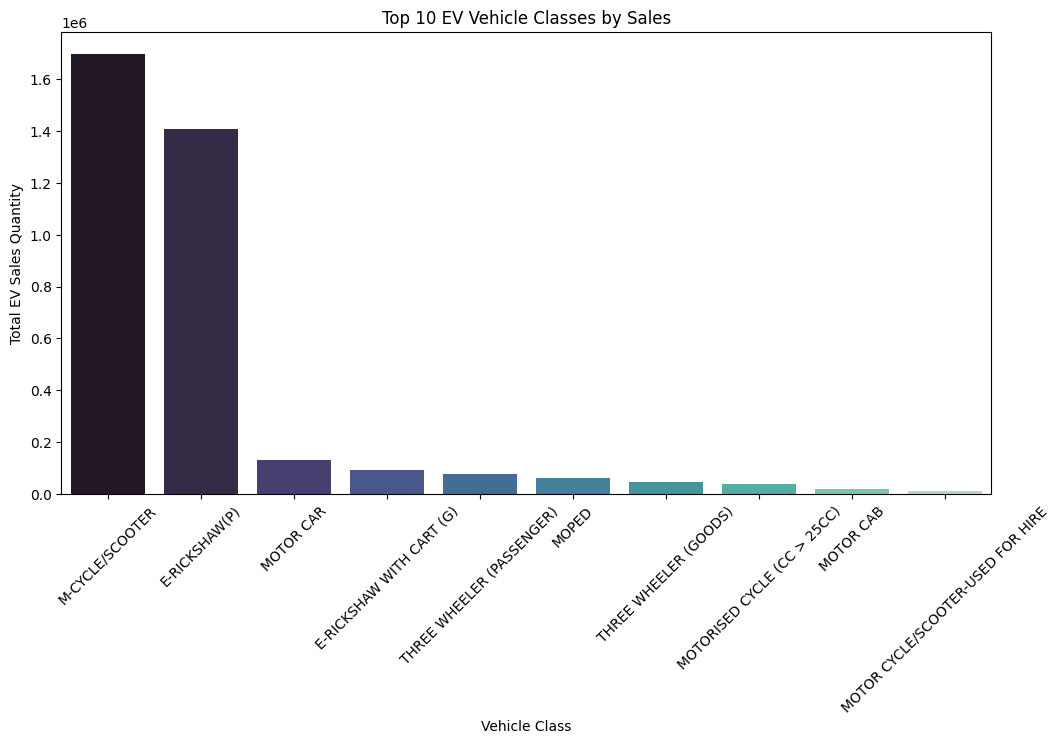

Vehicle_Class
M-CYCLE/SCOOTER              1697373.0
E-RICKSHAW(P)                1408127.0
MOTOR CAR                     130676.0
E-RICKSHAW WITH CART (G)       90656.0
THREE WHEELER (PASSENGER)      76132.0
Name: EV_Sales_Quantity, dtype: float64

In [13]:
# EV Sales by Vehicle Class
vehicle_class_sales = df.groupby("Vehicle_Class")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

# Plot top 10 vehicle classes
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_class_sales.head(10).index, y=vehicle_class_sales.head(10).values, palette="mako")
plt.xticks(rotation=45)
plt.title("Top 10 EV Vehicle Classes by Sales")
plt.xlabel("Vehicle Class")
plt.ylabel("Total EV Sales Quantity")
plt.show()

# Display top 5 vehicle classes
vehicle_class_sales.head(5)


**Motorcycles & Scooters (1.69M sales) and E-Rickshaws (1.4M sales) dominate the EV market.**

**Motor Cars (130K sales) have lower adoption.**
    
**Three-Wheelers and E-Rickshaws with carts are also significant contributors.**

### EV Sales Market Share by State

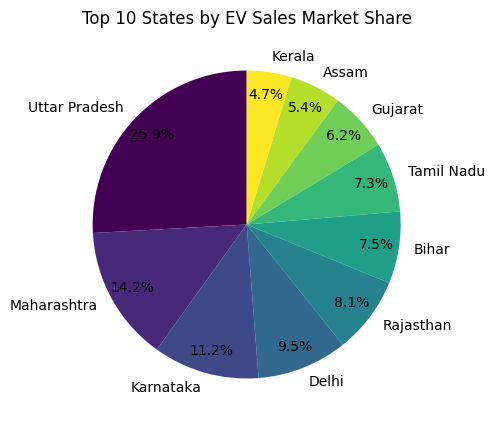

State
Uttar Pradesh    20.370409
Maharashtra      11.172958
Karnataka         8.778926
Delhi             7.472235
Rajasthan         6.360184
Name: EV_Sales_Quantity, dtype: float64

In [14]:
# EV Sales Market Share by State
state_market_share = (state_sales / state_sales.sum()) * 100

# Plot top 10 states by market share
plt.figure(figsize=(10, 5))
state_market_share.head(10).plot(kind="pie", autopct="%1.1f%%", cmap="viridis", startangle=90, pctdistance=0.85)
plt.title("Top 10 States by EV Sales Market Share")
plt.ylabel("")
plt.show()

# Display market share of top 5 states
state_market_share.head(5)


**Uttar Pradesh leads with 20.37% of India's EV market.**
    
**Maharashtra (11.17%) and Karnataka (8.77%) follow.**
                                      
**Delhi (7.47%) and Rajasthan (6.36%) also contribute significantly.**
                               
**The top 5 states account for over 50% of total EV sales.**

# Correlation Analysis

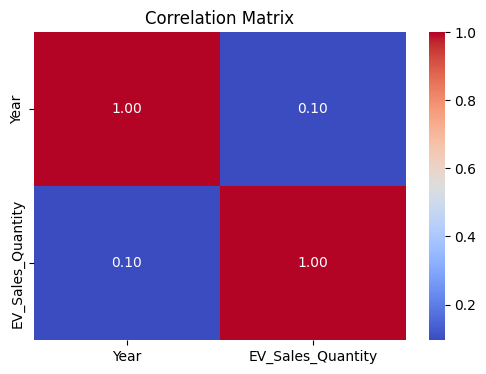

,Year,EV_Sales_Quantity
Year,1.000000,0.095326
EV_Sales_Quantity,0.095326,1.000000


In [15]:
# 15. Correlation Analysis
correlation_matrix = df[["Year", "EV_Sales_Quantity"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Display correlation values
correlation_matrix

**Weak correlation (0.095) between Year and EV Sales Quantity.**
    
**Suggests that while EV adoption has increased over time, sales are influenced by other factors like policies, infrastructure, and incentives.**

# Feature Enginnering

**Create new features such as month and day from the Date column and encode
categorical variables.**

In [16]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State',
'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)
# Drop unnecessary columns like Date, Month_Name (if already extracted into numerical values)
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

## Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Split the data into features and target variable
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Instantiate the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


## Model Evaluation

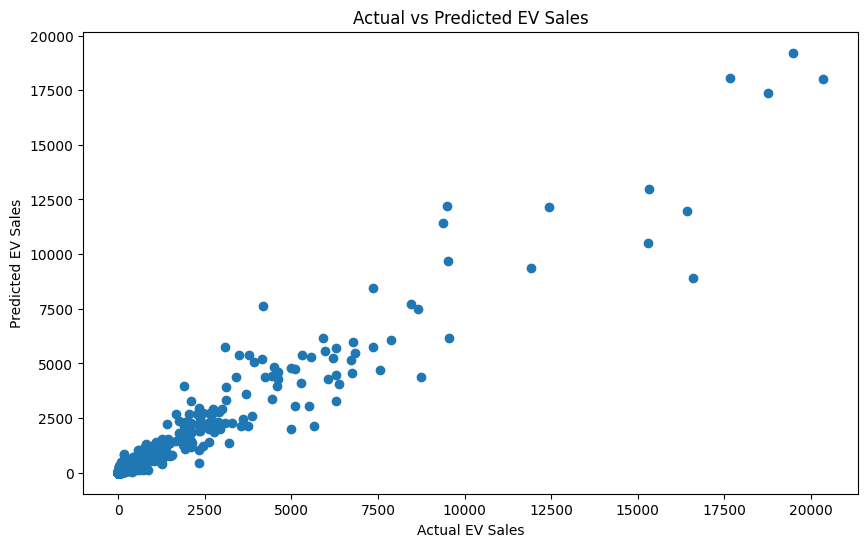

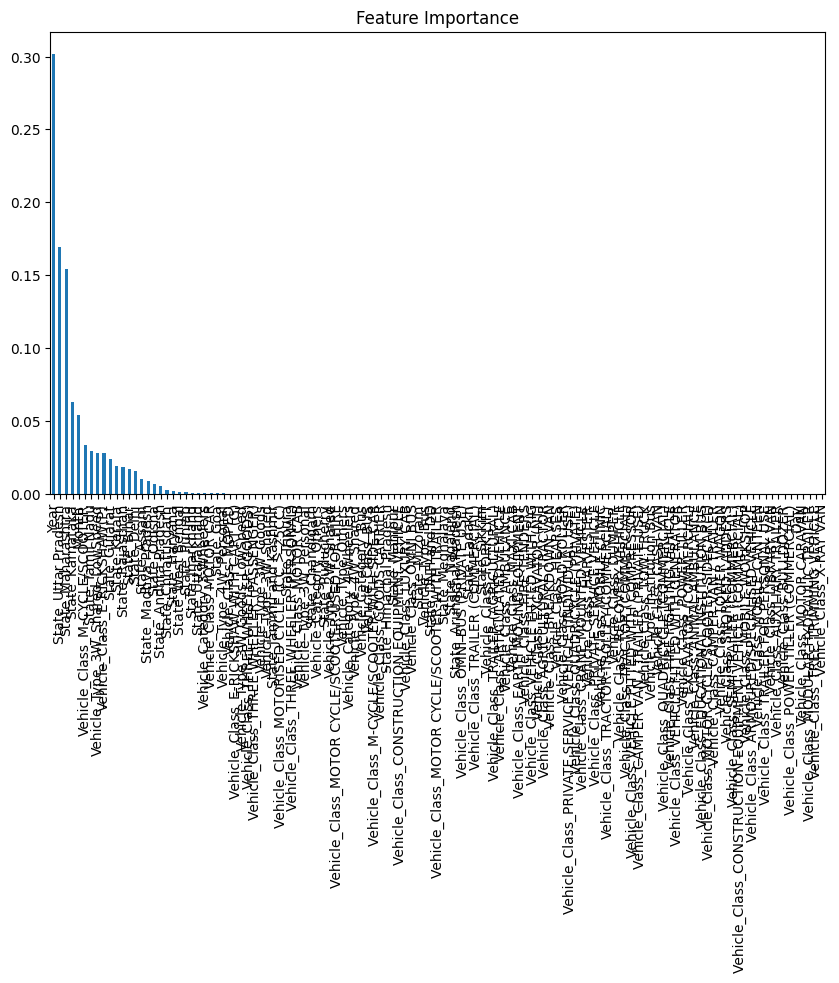

In [18]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)
# Plot the most important features
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Conclusion

**The analysis of EV sales in India shows a strong growth trend, with certain states leading in adoption. Two-wheeler and three-wheeler EVs dominate the market. Seasonal variations and policy impacts influence sales. Continuous growth suggests increasing EV acceptance, but infrastructure improvements are crucial for sustained expansion.**